# **Mission 1. Netfilx and Code**

**Mandatory Part**

In [1]:
import pandas as pd
titles=pd.read_csv('netflix_titles.csv')
titles.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
titles.shape

(8807, 12)

In [4]:
south_korea_titles = titles[titles['country']=='South Korea']
row, _ = south_korea_titles.shape
row

199

**(답)=> 한국 작품은 총 199개 있습니다.**

# **Mission 2. 가즈아!**

**Mandatory Part**

In [7]:
bitcoin = pd.read_csv('BitCoin.csv')
bitcoin.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [8]:
bitcoin=bitcoin['2016-06'<bitcoin['Date']]
bitcoin=bitcoin[bitcoin['Date']<'2017-06']
bitcoin=bitcoin.sort_values('Date')
bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
625,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
594,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
565,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
534,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
504,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
118,118,2017-05-27,2196.27,2260.20,1855.83,2038.87,1.700480e+09,35917100000
117,117,2017-05-28,2054.08,2267.34,2054.08,2155.80,1.147140e+09,33595900000
116,116,2017-05-29,2159.43,2307.05,2107.17,2255.61,9.946250e+08,35323500000
115,115,2017-05-30,2255.36,2301.96,2124.57,2175.47,1.443970e+09,36897000000


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
dates=[bitcoin.iloc[4]['Date']]
total=0
for j in range(5):
    total+=bitcoin.iloc[4-j]['Open']
mavgs=[total/5]

for i in range(5, len(bitcoin)):
    dates.append(bitcoin.iloc[i]['Date'])
    # total=0
    # for j in range(5):
        # total+=bitcoin.iloc[i-j]['Open']
    # mavgs=[total/5]
    mavgs.append(mavgs[-1]+bitcoin.iloc[i]['Open']/5-bitcoin.iloc[i-5]['Open']/5)
dates = np.array(dates)

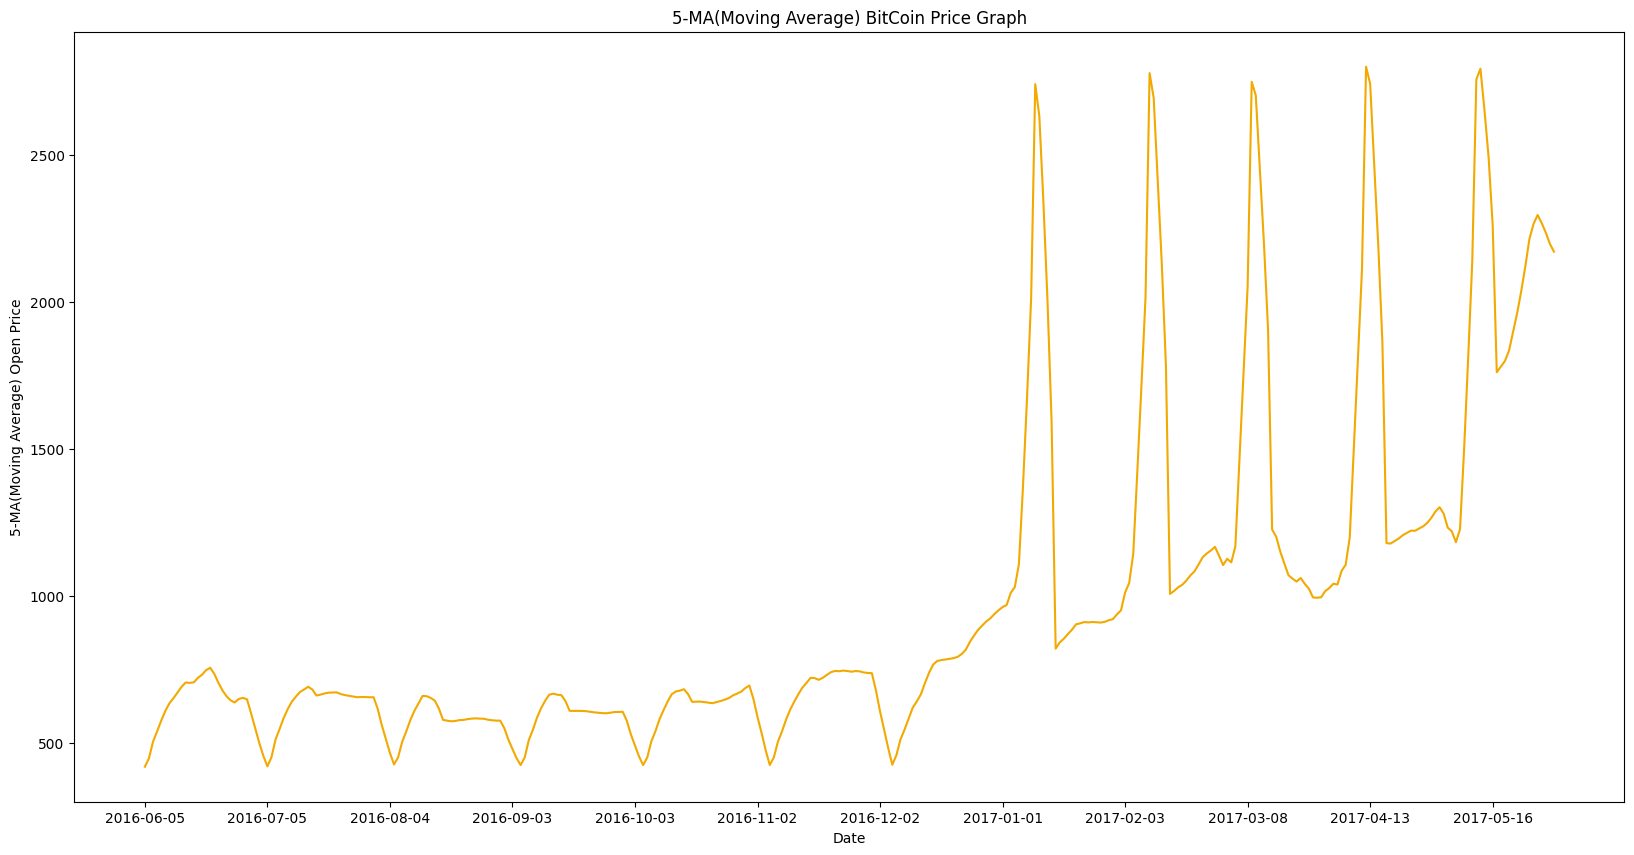

In [44]:
plt.figure(figsize=(20,10))
plt.title('5-MA(Moving Average) BitCoin Price Graph')
plt.xlabel('Date')
plt.ylabel('5-MA(Moving Average) Open Price')
plt.xticks([ i for i in range(0, len(dates), 30)])
plt.plot(dates, mavgs, '#f2a900')
plt.show()